In [1]:
import numpy as np
import pandas as pd

data_606 = pd.read_csv('606sets.csv', index_col=False)
data_acsf = pd.read_csv('acsf20new1.csv')

data_ALL = data_606.join(data_acsf)
data_ALL.head(2)

,ID,Formula,order,d,TMatom,co-atoms,SpinMM,TM-ionicR,co-ionicR,Sum-ionicR,...,ACSF_11,ACSF_12,ACSF_13,ACSF_14,ACSF_15,ACSF_16,ACSF_17,ACSF_18,ACSF_19,ACSF_20
0,4,Fe4S8,1,6,Fe,S,4.898979,63.0,184.0,247.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11,Ca2Mn2Si2,0,5,Mn,Si,5.916080,66.0,26.0,92.0,...,0.339,1.452,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

In [3]:
y = data_ALL['order'].values
excluded = ['ID', 'Formula', 'order', 'TMatom', 'co-atoms']
X = data_ALL.drop(excluded, axis = 1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, 
                                                    test_size = 0.2,
                                                    random_state = 38)

In [5]:
X.describe()

,d,SpinMM,TM-ionicR,co-ionicR,Sum-ionicR,TM-CVR,CO-CVR,Sum-CVR,TM-DP,CO-DP,...,ACSF_11,ACSF_12,ACSF_13,ACSF_14,ACSF_15,ACSF_16,ACSF_17,ACSF_18,ACSF_19,ACSF_20
count,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,...,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.00000
mean,5.483498,4.351014,67.812706,118.919142,186.731848,125.204620,108.929043,234.133663,73.166436,34.986528,...,0.184790,0.335332,0.082787,0.003761,0.021964,0.046634,0.004305,0.000937,0.002955,0.00152
std,2.409806,1.841944,13.091256,80.937176,81.410948,14.004405,28.089407,32.028195,27.742865,30.325209,...,0.426975,0.630666,0.352585,0.034615,0.115228,0.221868,0.075984,0.016322,0.051404,0.02670
min,0.000000,0.000000,39.000000,-38.000000,8.000000,110.000000,32.000000,142.000000,26.140000,3.740000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,5.000000,2.828427,59.000000,58.000000,118.000000,116.000000,99.000000,221.000000,55.000000,14.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5.000000,4.898979,66.000000,135.000000,208.000000,122.000000,114.000000,236.000000,68.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,5.916080,73.000000,196.000000,259.000000,134.000000,133.000000,252.750000,83.000000,40.000000,...,0.134500,0.641000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10.000000,6.928203,152.000000,221.000000,357.000000,210.000000,185.000000,326.000000,319.800000,197.200000,...,3.796000,4.747000,2.696000,0.500000,0.928000,1.825000,1.529000,0.298000,0.903000,0.52600


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [7]:
scaler.fit(X_train)

StandardScaler()

In [8]:
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

In [9]:
np.mean(X_train_s, axis = 0)

array([ 6.42277783e-17, -8.84508261e-16, -5.32173020e-16,  9.17539690e-18,
       -1.13774922e-16,  1.13774922e-16, -2.93612701e-17,  4.62440004e-16,
       -1.76167620e-16,  1.59651906e-16,  2.00023652e-16,  4.95471432e-16,
        6.04658656e-16, -2.54158494e-16, -4.17939329e-16, -3.11963495e-17,
       -5.06481909e-16, -1.06067588e-15,  5.37678258e-16, -9.30385245e-16,
        7.34031752e-18,  2.56911113e-17, -1.98188573e-16, -3.30314288e-17,
       -7.52382546e-17,  4.58769845e-18, -9.17539690e-18,  1.04599525e-16,
        6.97330164e-17,  5.13822226e-17,  7.34031752e-18, -7.34031752e-18,
       -1.04599525e-16,  2.20209526e-17,  3.85366670e-17,  7.15680958e-17,
        1.10104763e-17,  3.30314288e-17,  7.34031752e-18,  5.13822226e-17])

In [10]:
np.std(X_train_s, axis = 0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1.])

In [11]:
np.mean(X_test_s, axis = 0)

array([-0.06475096, -0.08875856,  0.09794723, -0.09660045, -0.08066887,
        0.11417549, -0.06454977, -0.00936952,  0.13970814, -0.00718758,
        0.07982007,  0.0021007 , -0.03062464, -0.02632161, -0.05229871,
        0.16256887,  0.09699881,  0.17470944, -0.00441914,  0.0507696 ,
        0.08982438, -0.01146071,  0.10847475,  0.15079976, -0.07362171,
       -0.01890275, -0.00808004, -0.09544067,  0.01937898,  0.00268792,
        0.03370133,  0.02456053,  0.08279227,  0.006926  , -0.00172373,
        0.04831945, -0.06347865, -0.06433721, -0.06441339, -0.06377116])

In [12]:
np.std(X_test_s, axis = 0)

array([1.06456890e+00, 9.64925736e-01, 1.18929778e+00, 9.76991646e-01,
       9.58923365e-01, 1.23095301e+00, 9.75220401e-01, 9.84491025e-01,
       1.51968102e+00, 1.04634580e+00, 1.20928911e+00, 1.15102139e+00,
       9.67412532e-01, 9.62277040e-01, 1.01256340e+00, 1.05534115e+00,
       9.88580556e-01, 1.51091071e+00, 9.61865813e-01, 9.95248583e-01,
       9.46640363e-01, 8.89386824e-01, 1.01719987e+00, 9.58798826e-01,
       9.87987268e-01, 8.24416464e-01, 1.01693060e+00, 9.30690474e-01,
       1.07576925e+00, 9.24838168e-01, 1.11902409e+00, 1.02108432e+00,
       1.18937068e+00, 1.03168302e+00, 9.39296164e-01, 1.10216123e+00,
       1.38777878e-17, 1.38777878e-17, 1.38777878e-17, 0.00000000e+00])

In [13]:
modelsvc = SVC(kernel="linear", random_state = 1)
modelsvc.fit(X_train_s, y_train)
modelsvc.score(X_test_s, y_test)

0.8032786885245902

In [14]:
#param_grid = {'C': [0.1, 1, 10],
#              'kernel': ('linear', 'poly', 'rbf', 'sigmoid'),
#              'gamma': [0.01, 0.1, 1]}
#kfold = StratifiedKFold(n_splits=10, shuffle=True,
#                        random_state = 45)
#model_svc = GridSearchCV(SVC(random_state = 46),
#                     param_grid, cv = kfold)

In [15]:
#model_svc.fit(X_train_s, y_train)
#model_svc.score(X_test_s, y_test)

In [16]:
#model_svc.best_params_

In [17]:
#model_svc.best_estimator_

In [18]:
model_SVC = SVC(C=10, gamma=0.01, random_state=46, kernel='rbf')
model_SVC.fit(X_train_s, y_train)
model_SVC.score(X_test_s, y_test)

0.8688524590163934

In [19]:
y_pred = model_SVC.predict(X_test_s)
y_pred.shape

(122,)

[[46  4]
 [12 60]]


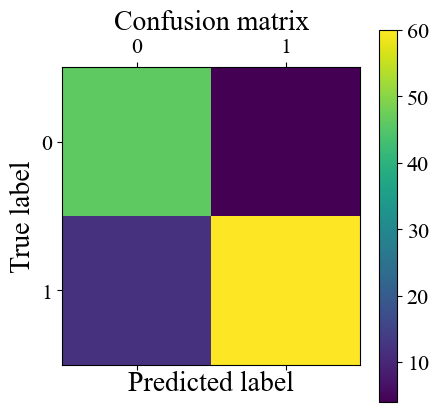

In [21]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Times New Roman']
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
plt.matshow(confusion_matrix)
plt.title('Confusion matrix',fontsize = 20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=16)
plt.ylabel('True label', fontsize = 20)
plt.xlabel('Predicted label',fontsize = 20)
plt.savefig('c2.png', dpi = 300)
#plt.show()

In [22]:
#from sklearn.inspection import plot_partial_dependence
table = pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames = ['Predicted'])
table

Predicted,0,1
Actual,,
0,46,4
1,12,60


In [23]:
table = np.array(table)
Accuracy = (table[0, 0] + table[1,1]) /np.sum(table)
print(Accuracy)

Error_rate = 1 - Accuracy
print(Error_rate)

0.8688524590163934
0.1311475409836066


In [24]:
Precision = table[1, 1]/(table[1, 1]+table[0, 1])
print('Precision:', Precision)

Sensitivity = table[1, 1]/(table[1, 0] + table[1,1])
print(Sensitivity)

Specificity = table[0, 0] /(table[0,0] + table[0, 1])
print(Specificity)

Recall = table[1, 1] /(table[0, 1] + table[1,1])
print(Recall)

print(f1_score(y_test, y_pred))
cohen_kappa_score(y_test, y_pred)

Precision: 0.9375
0.8333333333333334
0.92
0.9375
0.8823529411764706


0.735357917570499

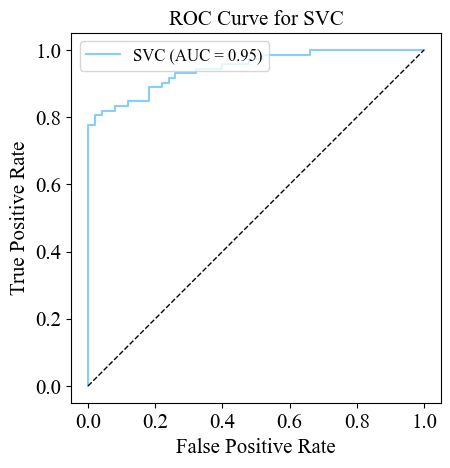

In [25]:
from sklearn.metrics import RocCurveDisplay
plt.rcParams['font.sans-serif']=['Times New Roman']

RocCurveDisplay.from_estimator(model_SVC, X_test_s, y_test, color = 'lightskyblue')
x = np.linspace(0, 1, 100)
plt.plot(x, x, 'k--', linewidth = 1)
plt.title('ROC Curve for SVC', fontsize = 15)
plt.axis('square')
plt.xlim()
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('False Positive Rate', fontsize = 15)
plt.ylabel('True Positive Rate',fontsize = 15)
fontdict = {'family': 'Times New Roman',
            'size': 12}
            #'style': 'italic'}
plt.legend(prop=fontdict, loc = 'upper left')
plt.savefig('r2.png', dpi = 300)
#plt.show()